In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
M=nx.read_gml("polblogs.gml")

In [5]:
# create weighted graph from M
G = nx.Graph()
for u,v,data in M.edges_iter(data=True):
    if G.has_edge(u,v):
        G[u][v]['weight'] += 1
    else:
        G.add_edge(u, v, weight=1)

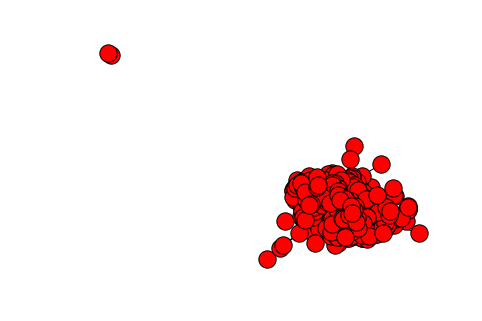

In [6]:
nx.draw(G)

<h3>1. Create a nice looking graph of the political blog network</h3>

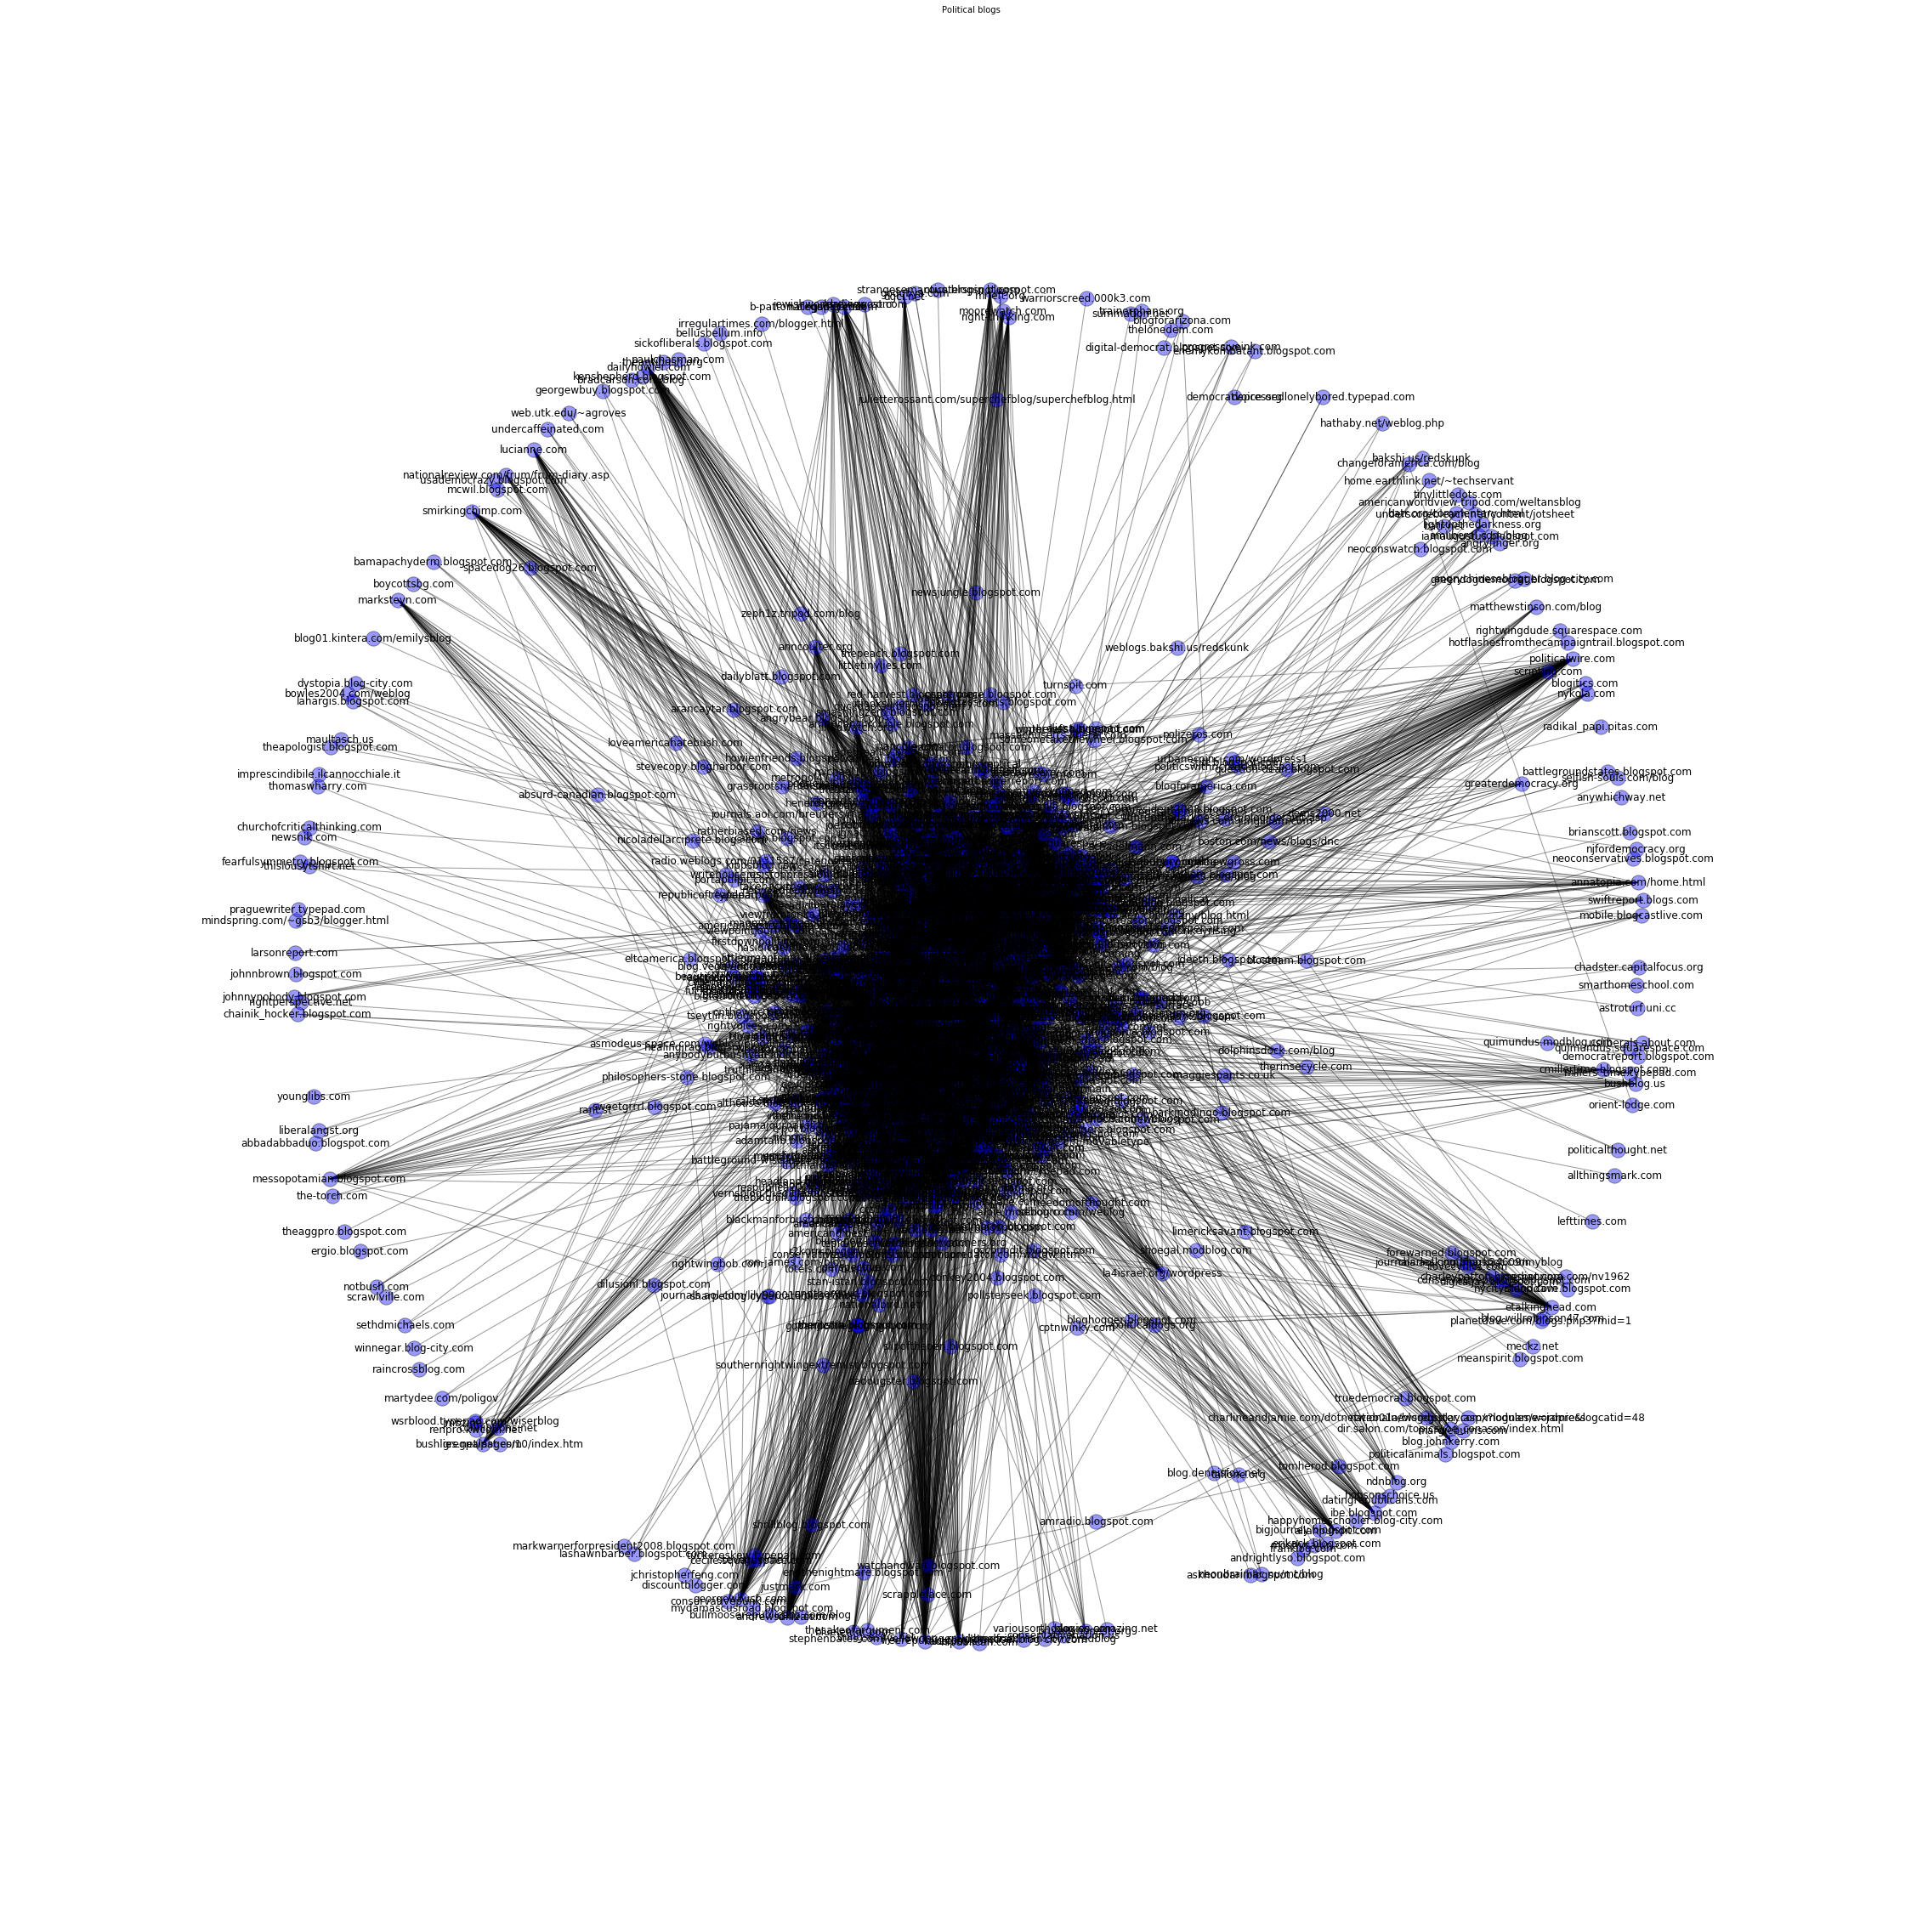

In [13]:
plt.figure(figsize=(40,40))
pos=nx.spring_layout(M, iterations=500, scale=5, k=.3)
nx.draw_networkx_labels(G,pos,fontsize=8)
font = {'color'      : 'k',
            'fontsize'   : 10}
plt.title("Political blogs", font)

nx.draw_networkx_nodes(G,pos,node_color='b',alpha=0.4)
nx.draw_networkx_edges(G,pos,alpha=0.4,node_size=0,width=1,edge_color='k')
plt.axis('off')
plt.show()

<h3>2. What are the 10 most influential blogs?</h3>

In [8]:
centrality= nx.eigenvector_centrality_numpy(G)

In [9]:
blog_list = []
for node in centrality:
    blog_list.append((node,centrality[node]))
    
sorted_blog_list = blog_list.sort(key=lambda x: x[1])

In [10]:
#get top 10 influential blog
sorted(blog_list, key=lambda x: x[1], reverse=True)[:10]

[(u'atrios.blogspot.com', 0.1948229589885677),
 (u'dailykos.com', 0.16090716385818704),
 (u'washingtonmonthly.com', 0.14654050463836452),
 (u'digbysblog.blogspot.com', 0.14265582251978673),
 (u'bodyandsoul.typepad.com', 0.14114853531288896),
 (u'liberaloasis.com', 0.13953785666658589),
 (u'tbogg.blogspot.com', 0.13704857535546855),
 (u'corrente.blogspot.com', 0.1294307313422499),
 (u'talkingpointsmemo.com', 0.1270093107829416),
 (u'dneiwert.blogspot.com', 0.12238703900638014)]

<h3>3. What are the 10 least influential blogs?</h3>

In [11]:
#Return the top 10 least influential
sorted(blog_list, key=lambda x: x[1], reverse=False)[:10]

[(u'digital-democrat.blogspot.com', -8.168780624348547e-19),
 (u'thelonedem.com', 1.021068056426643e-18),
 (u'americanworldview.tripod.com/weltansblog', 7.489792408234763e-09),
 (u'quimundus.modblog.com', 6.675725344762987e-08),
 (u'batr.org/commentary.html', 6.794245454784778e-07),
 (u'batr.net', 6.795053204384676e-07),
 (u'democratvoice.org', 1.0221602317211846e-06),
 (u'quimundus.squarespace.com', 6.056497487441401e-06),
 (u'massachusetts-liberal.com', 9.484711746611905e-06),
 (u'thingsasitis.net', 1.1737028626599908e-05)]

<h3>4. Answer this question for both left wing and right wing blogs seperately. (Optional 10 Extra Credit Points)</h3>